In [1]:
import Ramsey_ExperimentV2
import estimator
import numpy as np

In [39]:
from tqdm import tqdm
import random

T = np.pi
uni_delay = np.linspace(0, T, 50)
shots = np.arange(500, 20000, 2000)
errors_fisher = []
errors_local = []
uniform_local = []
n = 1
delay = [0.3]
fisher_delay = [0.147, 0.6]

repetitions = 10
W = [5]
Decay = [5]
J = []

for rep in range(repetitions):
    rep_error_fisher = []
    rep_error_local = []
    # rep_error_uniform = []
    # W = [random.gauss(0, 3) for _ in range(n)]
    # Decay = [random.gauss(3, 1) for _ in range(n)]
    # J = [random.gauss(0, 3) for _ in range(n - 1)]
    for s in tqdm(shots, desc=f"Repetition {rep}"):
        batch_x, batch_y = Ramsey_ExperimentV2.ramsey_global(n, s, delay, Decay, W, J)
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV2.ramsey_local(n, s, delay, Decay,
                                                                                                  W, J)

        batch_det, batch_cross = Ramsey_ExperimentV2.ramsey_local_X(n, s, fisher_delay, Decay, W, J)
        # batch_uni_det, batch_uni_cross = Ramsey_ExperimentV2.ramsey_local_X(n, s, uni_delay, Decay, W, J)

        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        # Decay_uni, W_uni, J_uni = estimator.one_by_one_X(batch_uni_det, batch_uni_cross)


        rep_error_fisher.append(estimator.percent_error(np.concatenate([Decay, W, J]),
                                                        np.concatenate([Decay_fisher, W_fisher, J_fisher])))
        rep_error_local.append(estimator.percent_error(np.concatenate([Decay, W, J]),
                                                       np.concatenate([Decay_local, W_local, J_local])))
        # rep_error_uniform.append(estimator.percent_error(np.concatenate([Decay, W, J]),
        #                                                  np.concatenate([Decay_uni, W_uni, J_uni])))

    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    # uniform_local.append(rep_error_uniform)


Repetition 9: 100%|██████████| 10/10 [00:03<00:00,  3.33it/s]


In [40]:
errors_fisher_reshaped = list(map(list, zip(*errors_fisher)))
errors_fisher_median = [np.median(np.array(errors_fisher_reshaped[i])) for i in range(len(errors_fisher_reshaped))]
errors_fisher_std = [np.std(np.array(errors_fisher_reshaped[i])) for i in range(len(errors_fisher_reshaped))]

errors_local_reshaped = list(map(list, zip(*errors_local)))
errors_local_median = [np.median(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]
errors_local_std = [np.std(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]

errors_uniform_reshaped = list(map(list, zip(*uniform_local)))
errors_uniform_median = [np.median(np.array(errors_uniform_reshaped[i])) for i in range(len(errors_uniform_reshaped))]
errors_uniform_std = [np.std(np.array(errors_uniform_reshaped[i])) for i in range(len(errors_uniform_reshaped))]

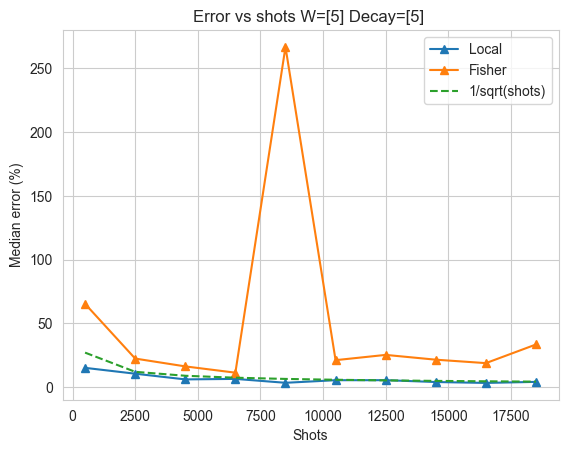

In [45]:
import matplotlib.pyplot as plt

# plt.plot(shots, errors_global_median, '-^', label='Global')
plt.plot(shots, errors_local_median, '-^', label='Local')
plt.plot(shots, errors_fisher_median, '-^', label='Fisher')
# plt.plot(shots, errors_uniform_median, '-^', label='Uniform')
# plt.errorbar(shots, errors_fisher_median, yerr=errors_fisher_std, fmt='none', ecolor='red')
# plt.errorbar(shots, errors_local_median, yerr=errors_local_std, fmt='none', ecolor='black')

plt.title(f'Error vs shots W={W} Decay={Decay} ')
plt.plot(shots, np.e * np.sqrt(Decay[0]) / np.sqrt(shots) * 100, '--', label='1/sqrt(shots)')
plt.xlabel('Shots')
plt.ylabel('Median error (%)')
# plt.yscale('log')
# plt.xscale('log')

plt.legend()